In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_sales = pd.read_csv("Advertising.csv")
print(df_sales)

     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [3]:
df_sales.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Dropping the unnamed column
df_sales.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df_sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
#Check for null values
df_sales.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

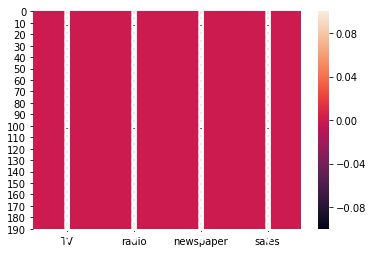

In [7]:
sns.heatmap(df_sales.isnull(),annot=True)
plt.show()

In [8]:
df_sales.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [9]:
df_sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df_sales.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


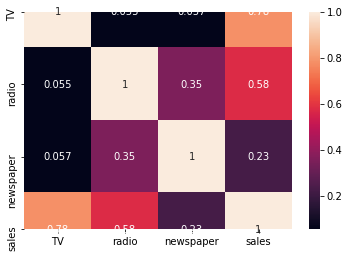

In [11]:
sns.heatmap(df_sales.corr(),annot=True)
#There is strong correlation between TV and Sales and least between newspaper and Sales

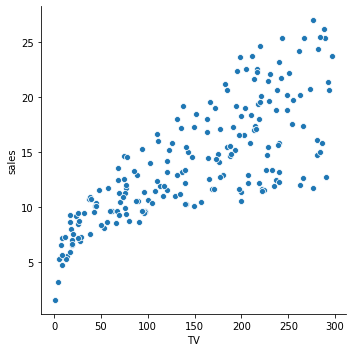

In [12]:
sns.relplot(x="TV", y="sales", data=df_sales);
#Relationshio between TV and Sales is somewhat linear

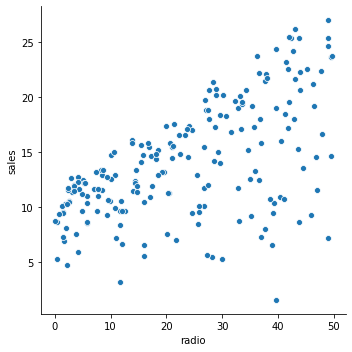

In [13]:
sns.relplot(x="radio", y="sales", data=df_sales);
#Relationshio between Radio and Sales is somewhat linear

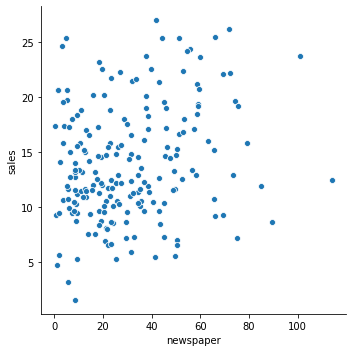

In [14]:
sns.relplot(x="newspaper", y="sales", data=df_sales);
#Relationshio between newspaper and Sales is not linear

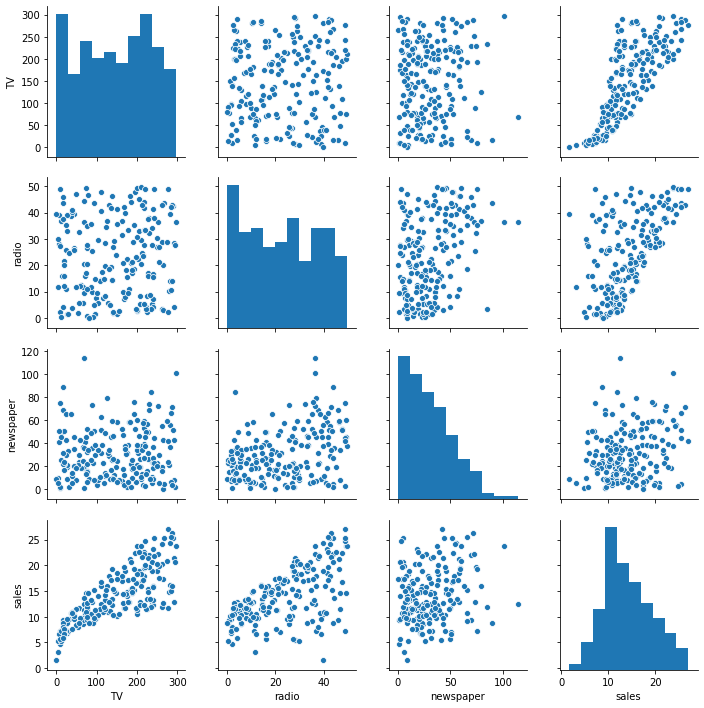

In [15]:
sns.pairplot(df_sales)
plt.show()

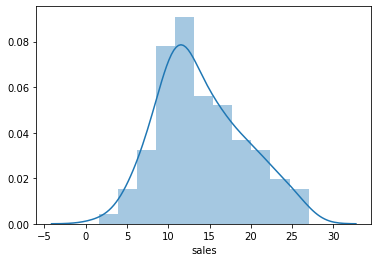

In [16]:
 sns.distplot(df_sales['sales'])

In [17]:
#Check for presence of outliers
from scipy.stats import zscore
z_scr=zscore(df_sales)
df_sales_final=df_sales.loc[(abs(z_scr)<3).all(axis=1)]
print(df_sales_final.shape)

(198, 4)


In [18]:
df_sales.shape

(200, 4)

In [19]:
#Skewness check
df_sales_final.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [20]:
#Removing skewness
import numpy as np
for index in df_sales_final.skew().index:
    if df_sales_final.skew().loc[index]>0.5:
        df_sales_final[index]=np.sqrt(df_sales_final[index])

In [21]:
df_sales_final.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

In [22]:
df_x=df_sales_final.iloc[:,:-1]
df_y=df_sales_final.iloc[:,-1]

In [23]:
df_x

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [24]:
df_y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [25]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
df_x=sc.transform(df_x)

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,df_y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [27]:
from sklearn.model_selection import cross_val_score
def cv_score(regr,df_x,df_y,cv,scoring):
    cv=5
    scoring="r2"
    print("Mean r2 score for ",regr,"is ",cross_val_score(regr,df_x,df_y,cv=5,scoring="r2").mean())
    print("Standard Deviation in r2 score for ",regr,"is ",cross_val_score(regr,df_x,df_y,cv=5,scoring="r2").std())
    print("Cross Validation Score : ",cross_val_score(regr,df_x,df_y,cv=5,scoring="r2"))

Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
r_state=maxr2_score(lg,df_x,df_y)

max r2 score corresponding to  90  is  0.9468304700964035


In [29]:
cv_score(lg,df_x,df_y,cv=5,scoring="r2")

Mean r2 score for  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is  0.8857406146589945
Standard Deviation in r2 score for  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is  0.040941470257535015
Cross Validation Score :  [0.87927341 0.91751522 0.92568478 0.81065809 0.89557158]


Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
lasso=Lasso()
r_state=maxr2_score(lasso,df_x,df_y)

max r2 score corresponding to  77  is  0.874179999923636


In [31]:
cv_score(lasso,df_x,df_y,cv=5,scoring="r2")

Mean r2 score for  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is  0.8163649691832717
Standard Deviation in r2 score for  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is  0.04794468747620341
Cross Validation Score :  [0.82645638 0.82894058 0.87938517 0.73114928 0.81589343]


Ridge Regression

In [32]:
from sklearn.linear_model import Ridge
rd=Ridge()
r_state=maxr2_score(rd,df_x,df_y)

max r2 score corresponding to  90  is  0.9459357477026351


In [33]:
cv_score(rd,df_x,df_y,cv=5,scoring="r2")

Mean r2 score for  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) is  0.8858278340182535
Standard Deviation in r2 score for  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) is  0.041323018761447804
Cross Validation Score :  [0.87935456 0.91701188 0.92679226 0.81004311 0.89593736]


KNN regressor

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knn=KNeighborsRegressor()
clf = GridSearchCV(knn, neighbors, cv=10)
clf.fit(df_x,df_y)
clf.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 5}

In [35]:
knn=KNeighborsRegressor(n_neighbors=5)
r_state=maxr2_score(knn,df_x,df_y)

max r2 score corresponding to  97  is  0.9657596514724504


In [36]:
cv_score(knn,df_x,df_y,cv=5,scoring="r2")

Mean r2 score for  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is  0.9358043941034188
Standard Deviation in r2 score for  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is  0.03206995726981771
Cross Validation Score :  [0.94412733 0.95671675 0.95845528 0.87260099 0.94712163]


DecisionTree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor
dct=DecisionTreeRegressor()
r_state=maxr2_score(dct,df_x,df_y)

max r2 score corresponding to  90  is  0.9800475012107501


In [38]:
cv_score(dct,df_x,df_y,cv=5,scoring="r2")

Mean r2 score for  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') is  0.9571443205573594
Standard Deviation in r2 score for  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') is  0.013308937601350131
Cross Validation Score :  [0.97059049 0.95288861 0.94412177 0.93835337 0.97255244]


SVM Regressor

In [39]:
from sklearn.svm import SVR
sv=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(sv, parameters, cv=10)
clf.fit(df_x,df_y)
clf.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'kernel': 'rbf'}

In [40]:
sv=SVR(kernel="rbf",C=10)
r_state=maxr2_score(sv,df_x,df_y)

max r2 score corresponding to  63  is  0.9936839613606063


In [41]:
cv_score(sv,df_x,df_y,cv=5,scoring="r2")

Mean r2 score for  SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) is  0.9755245146805344
Standard Deviation in r2 score for  SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) is  0.019572012093225986
Cross Validation Score :  [0.98131013 0.98195058 0.98931419 0.93690782 0.98813985]


In [42]:
#Selecting SVR model as it gives better R2 score
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,random_state = 63,test_size=0.20)
sv=SVR(kernel="rbf",C=10)
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)

In [43]:
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.39475615746331005
r2_score is:  0.9936839613606063


In [44]:
#Save the Model
from sklearn.externals import joblib 
joblib.dump(sv, 'Model_Sales_Channel.pkl')

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Model_Sales_Channel.pkl']